### RGB


In [1]:
from tensorflow.keras.datasets import cifar10

# 데이터 세트 불러오기
(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# train, test 데이터 shape 출력
# .squeeze()를 사용해서 target 데이터의 dimension을 1차원으로 맞춰준다
# 원핫 인코딩 적용 여부를 편하게 판단하기 위함
print(train_images.shape, train_targets.squeeze().shape)
print(test_images.shape, test_targets.squeeze().shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 150s 1us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


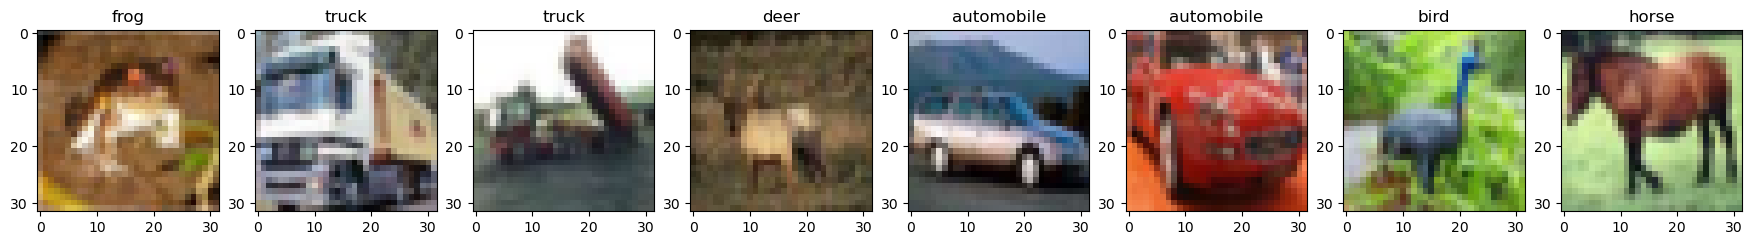

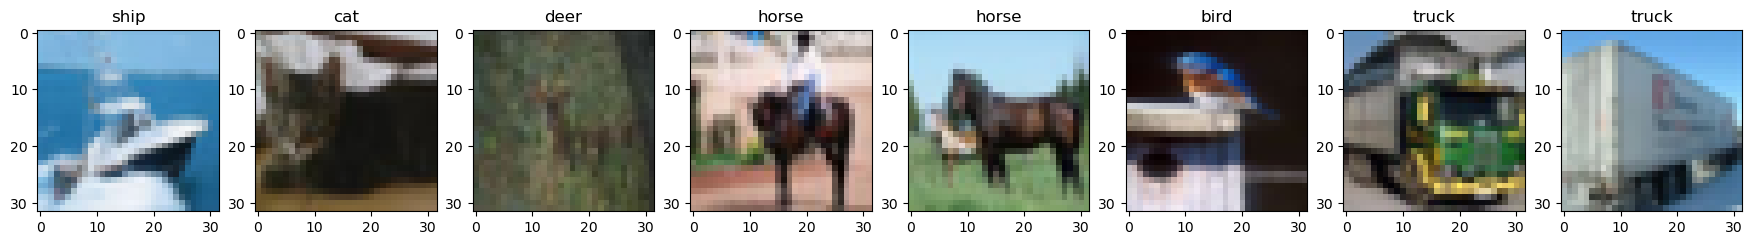

In [18]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(class_names[int(targets[i])])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# images MinMaxScaling 함수 선언
def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [3]:
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [4]:
train_images[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [5]:
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation

IMAGE_SIZE = 32

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# padding의 default는 valid
x = Conv2D(filters=32, kernel_size=5, padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Activation으로 활성화 함수 레이어를 따로 만들 수 있다 
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# name으로 레이어에 이름을 붙여줄 수 있다
x = Flatten(name='classifierA00')(x)
x = Dropout(rate=0.5, name='classfierA_Dropout01')(x)

x = Dense(300, activation='relu', name='classfierA_Dense01')(x)
x = Dropout(rate=0.3, name='classfierA_Dropout02')(x)

output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classfierA_Dropout01 (Dropout)       │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classfierA_Dense01 (Dense)           │ (None, 300)                 │         345,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classfierA_Dropout02 (Dropout)       │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 637,454 (2.43 MB)

 Trainable params: 637,454 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# SparseCategoricalCrossentropy: 원핫 인코딩 없이도 컴파일을 가능하게 해준다
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [17]:
# validation_split: train 데이터 중 일정 비율을 validation 데이터로 자동 분리해준다
# validation 데이터 따로 분리할 필요 없음
history = model.fit(x=train_images, 
                    y=train_targets, 
                    batch_size=128, 
                    epochs=30, 
                    validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - acc: 0.2317 - loss: 2.0434 - val_acc: 0.4279 - val_loss: 1.5718
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - acc: 0.4575 - loss: 1.4893 - val_acc: 0.5510 - val_loss: 1.2374
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - acc: 0.5561 - loss: 1.2432 - val_acc: 0.6204 - val_loss: 1.0701
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - acc: 0.6195 - loss: 1.0745 - val_acc: 0.6744 - val_loss: 0.9065
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - acc: 0.6703 - loss: 0.9297 - val_acc: 0.6870 - val_loss: 0.8726
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - acc: 0.7028 - loss: 0.8419 - val_acc: 0.7080 - val_loss: 0.8418
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - acc: 0.7264 - loss: 0.7756 - val_acc: 0.7305 - val_loss: 0.7769
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - acc: 0.7529 - loss: 0.7090 - val_acc: 0.7339 - val_loss: 0.7861
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━

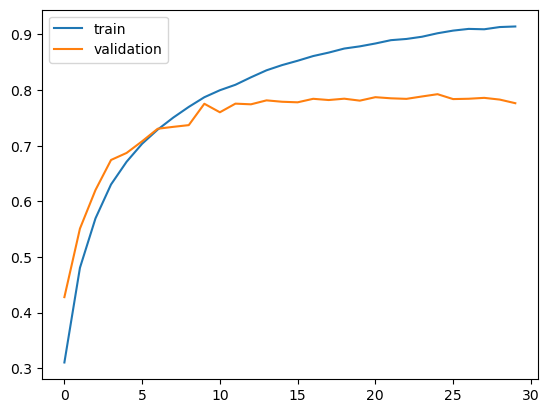

In [20]:
import matplotlib.pyplot as plt

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[3 9 0 9 4 7 9 0]


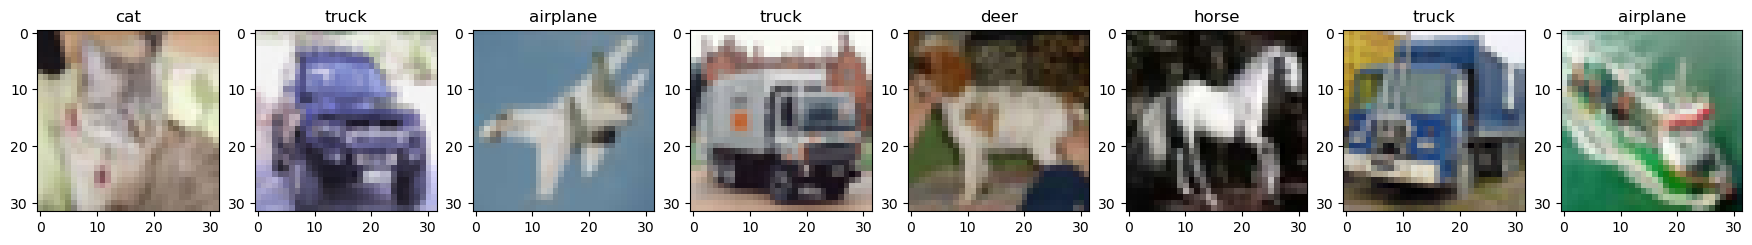

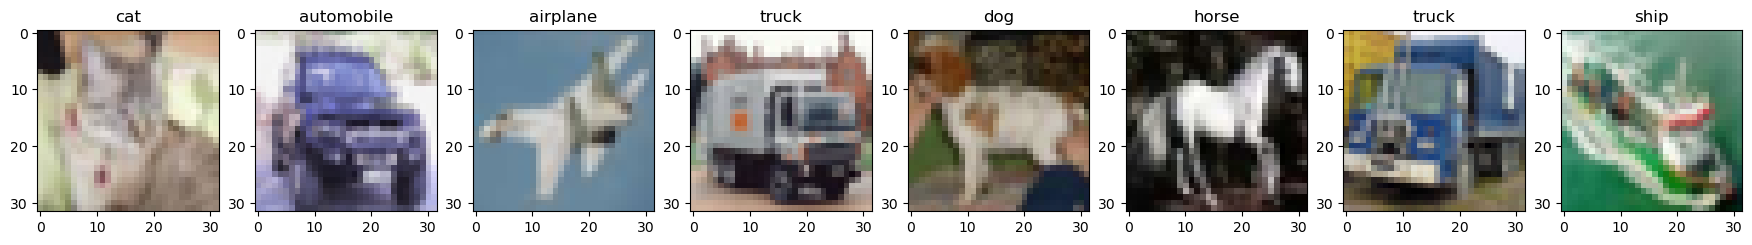

In [22]:
import numpy as np

pred_probas = model.predict(test_images[8:16], batch_size=128)
pred_classes = np.argmax(pred_probas.squeeze(), axis=1)
print(pred_classes)

show_images(test_images[8:16], pred_classes)
show_images(test_images[8:16], test_targets[8:16])